# Data Loading and Data Exploration

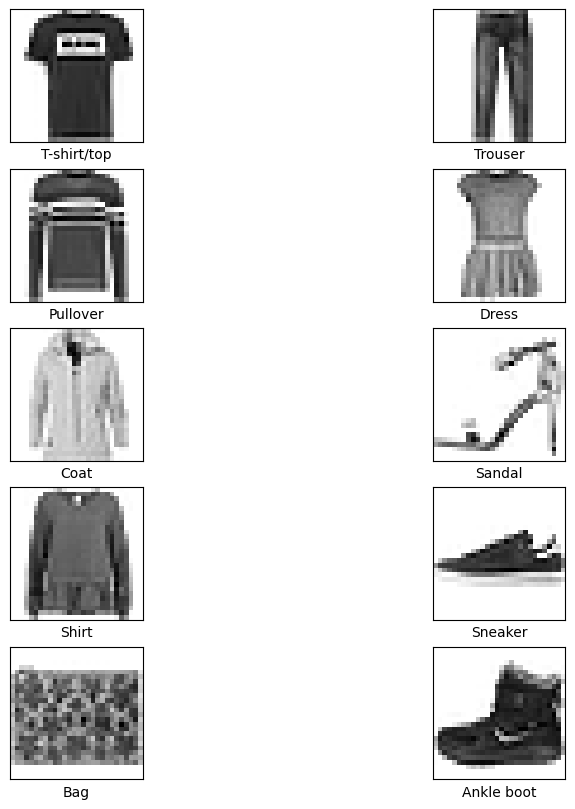

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Define class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plotting a sample from each class
plt.figure(figsize=(10,10))
for i in range(10):
    # Find an example of each class
    idx = np.where(train_labels == i)[0][0]
    plt.subplot(5, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.show()


# Normalization, Data Formatting, Shape of training and testing datasets and splitting data into testing and training datasets

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to have pixel values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape the images to fit the CNN input shape
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

# Split the training set to create a new validation set
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)


Shape of training images: (60000, 28, 28, 1)
Shape of training labels: (60000, 10)
Shape of test images: (10000, 28, 28, 1)
Shape of test labels: (10000, 10)


### Model -1 Shallow Neural Network


In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

# Define input layer
input_layer = Input(shape=(28, 28, 1))

# Flatten the input
x = Flatten()(input_layer)

# Add a dense layer with ReLU activation
x = Dense(128, activation='relu')(x)

# Add output layer with softmax activation
output_layer = Dense(10, activation='softmax')(x)

# Create the model
model1 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model1.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model 2 : Basic CNN

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Define the input
input_layer = Input(shape=(28, 28, 1))

# Add a convolutional layer
x = Conv2D(32, (3, 3), activation='relu')(input_layer)

# Add a max pooling layer
x = MaxPooling2D((2, 2))(x)

# Flatten the output to feed into a dense layer
x = Flatten()(x)

# Add a dense layer
x = Dense(128, activation='relu')(x)

# Output layer with softmax activation
output_layer = Dense(10, activation='softmax')(x)

# Create the model
model2 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model2.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                           

### Model 3: Deeper CNN

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Define the input
input_layer = Input(shape=(28, 28, 1))

# First convolutional block
x = Conv2D(64, (3, 3), padding='same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

# Second convolutional block
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

# Flatten the output
x = Flatten()(x)

# Dense layer
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer
output_layer = Dense(10, activation='softmax')(x)

# Create the model
model3 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model3.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 28, 28, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                          

### Model Training Function

In [ ]:
# splitting the data into training and testing dataset

from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


from tensorflow.keras.callbacks import ModelCheckpoint

def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    # Path to save the model file
    checkpoint_filepath = f'best_weights_{model.name}.h5'

    # Callback to save the best model
    model_checkpoint = ModelCheckpoint(
        checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max')

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), callbacks=[model_checkpoint])

    # Load best weights
    model.load_weights(checkpoint_filepath)

    return history

    # Parameters
epochs = 10
batch_size = 64

# Train Model 1: Shallow Neural Network
history_1 = train_model(model1, X_train, y_train, X_val, y_val, epochs, batch_size)

# Train Model 2: Basic CNN
history_2 = train_model(model2, X_train, y_train, X_val, y_val, epochs, batch_size)

# Train Model 3: Deeper CNN
history_3 = train_model(model3, X_train, y_train, X_val, y_val, epochs, batch_size)


Epoch 1/10
600/600 [==============================] - 2s 4ms/step - loss: 0.4747 - accuracy: 0.8352 - val_loss: 0.4085 - val_accuracy: 0.8629
Epoch 2/10
 57/600 [=>............................] - ETA: 1s - loss: 0.4157 - accuracy: 0.8550

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


600/600 [==============================] - 2s 3ms/step - loss: 0.4043 - accuracy: 0.8569 - val_loss: 0.3774 - val_accuracy: 0.8679
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3705 - accuracy: 0.8668 - val_loss: 0.3516 - val_accuracy: 0.8748
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3439 - accuracy: 0.8758 - val_loss: 0.3778 - val_accuracy: 0.8619
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.3242 - accuracy: 0.8825 - val_loss: 0.3351 - val_accuracy: 0.8792
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3083 - accuracy: 0.8880 - val_loss: 0.3573 - val_accuracy: 0.8715
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2941 - accuracy: 0.8939 - val_loss: 0.3297 - val_accuracy: 0.8797
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2821 - accuracy: 0.8968 - val_loss: 0.3104 - val_accuracy: 0.8864
Epoch 9/10
600/60

### Plot Training and Validation Metrics

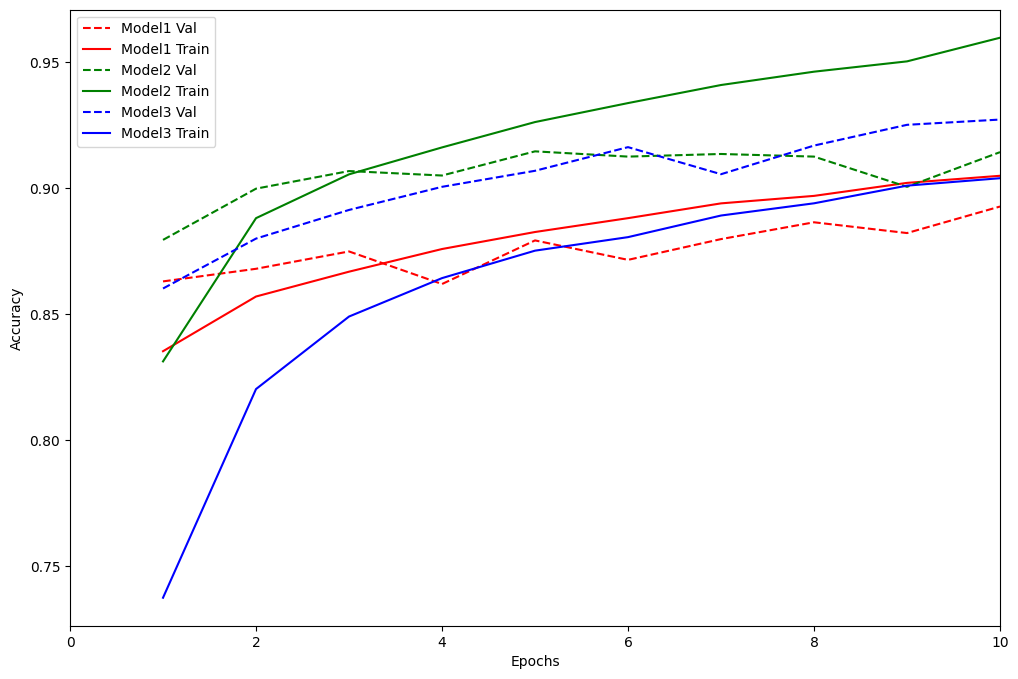

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(12, 8))

    # Define a list of colors for the plots
    colors = ['r', 'g', 'b', 'y', 'm', 'c']  # red, green, blue, yellow, magenta, cyan

    for index, (name, history) in enumerate(histories):
        # Ensure that there's a color for each history
        color = colors[index % len(colors)]

        val_acc = history.history['val_' + key]
        acc = history.history[key]
        epochs = range(1, len(acc) + 1)

        # Plot the validation accuracy
        plt.plot(epochs, val_acc, '--', label=f'{name.title()} Val', color=color)
        # Plot the training accuracy
        plt.plot(epochs, acc, label=f'{name.title()} Train', color=color)

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(epochs)])

# Assuming history_1, history_2, history_3 are the history objects from fitting your models
plot_history([('model1', history_1),
              ('model2', history_2),
              ('model3', history_3)])


### Evaluating  Model on Test Data

In [ ]:
# Assuming test_images and test_labels are your test datasets
accuracy_model_1 = model1.evaluate(test_images, test_labels, verbose=0)[1]  # [1] to get accuracy, which is the second item returned
accuracy_model_2 = model2.evaluate(test_images, test_labels, verbose=0)[1]
accuracy_model_3 = model3.evaluate(test_images, test_labels, verbose=0)[1]

print(f"Accuracy of Model 1: {accuracy_model_1:.2f}")
print(f"Accuracy of Model 2: {accuracy_model_2:.2f}")
print(f"Accuracy of Model 3: {accuracy_model_3:.2f}")


Accuracy of Model 1: 0.88
Accuracy of Model 2: 0.90
Accuracy of Model 3: 0.92


#### Combining the predictions from all three models by averaging them.

In [ ]:
import numpy as np

# Make predictions with each model
preds_1 = model1.predict(test_images)
preds_2 = model2.predict(test_images)
preds_3 = model3.predict(test_images)

# Average the predictions
average_predictions = (preds_1 + preds_2 + preds_3) / 3

# Convert averaged predictions to final predicted classes
final_preds = np.argmax(average_predictions, axis=1)

# Convert test labels from one-hot to integers for comparison
test_true_labels = np.argmax(test_labels, axis=1)

# Calculate the accuracy of the committee
committee_accuracy = np.mean(final_preds == test_true_labels)
print(f'Committee Accuracy: {committee_accuracy:.3f}')



313/313 [==============================] - 1s 2ms/step
Committee Accuracy: 0.903


### calculating accuracy of the commitee

In [ ]:
# Calculate the accuracy of the committee
true_labels = np.argmax(test_labels, axis=1)  # Assuming test_labels are one-hot encoded
committee_accuracy = np.mean(final_preds == true_labels)

print(f"Combined Accuracy of the Committee: {committee_accuracy:.2f}")

Combined Accuracy of the Committee: 0.92


### classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, final_preds, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.85      0.89      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.88      0.88      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.85      0.89      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.78      0.71      0.75      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Performance Metrics & Analysis:

### visualization using  confusion matrices

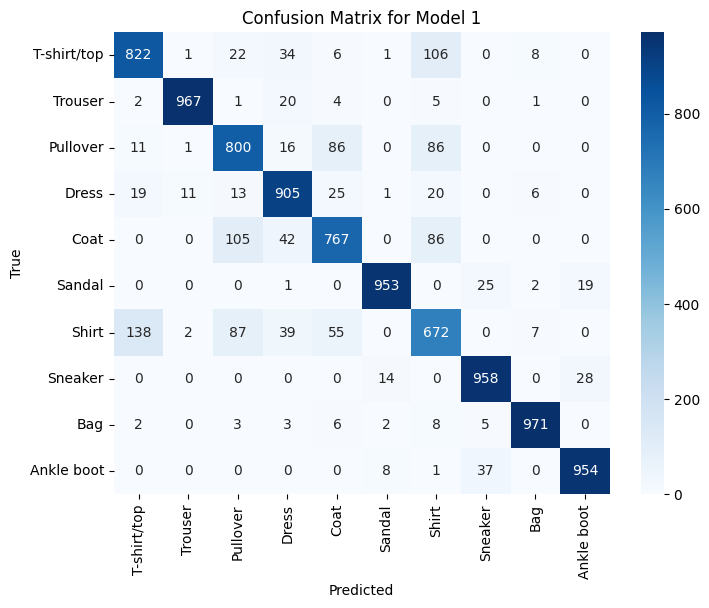

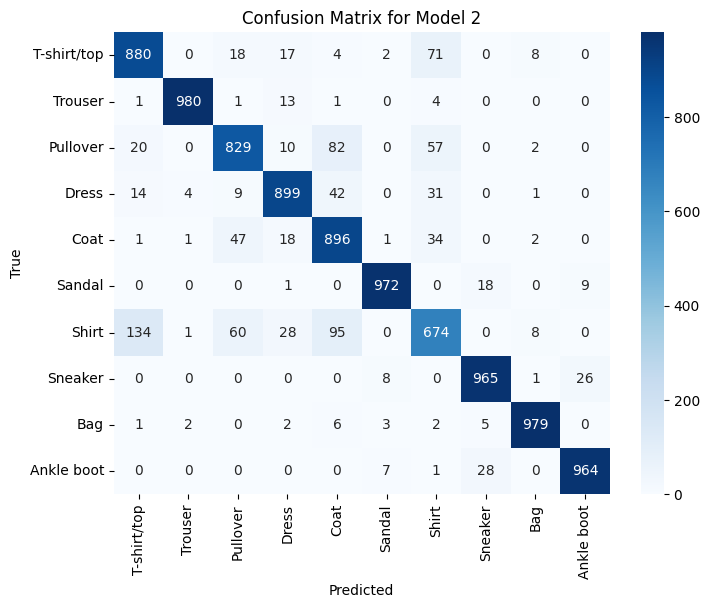

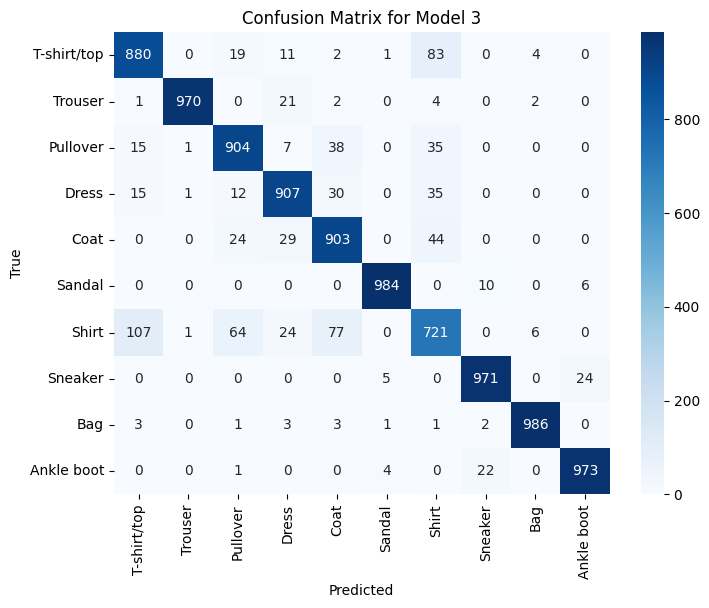

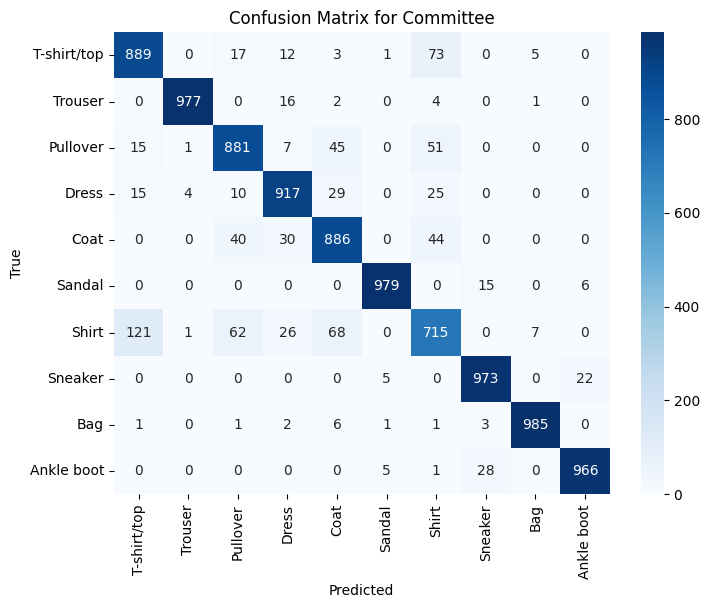

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions to class labels
pred_labels_1 = np.argmax(preds_1, axis=1)
pred_labels_2 = np.argmax(preds_2, axis=1)
pred_labels_3 = np.argmax(preds_3, axis=1)

# Confusion matrices
confusion_matrix_1 = confusion_matrix(true_labels, pred_labels_1)
confusion_matrix_2 = confusion_matrix(true_labels, pred_labels_2)
confusion_matrix_3 = confusion_matrix(true_labels, pred_labels_3)
committee_confusion_matrix = confusion_matrix(true_labels, final_preds)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)

# Plotting confusion matrices
plot_confusion_matrix(confusion_matrix_1, 'Confusion Matrix for Model 1')
plot_confusion_matrix(confusion_matrix_2, 'Confusion Matrix for Model 2')
plot_confusion_matrix(confusion_matrix_3, 'Confusion Matrix for Model 3')
plot_confusion_matrix(committee_confusion_matrix, 'Confusion Matrix for Committee')


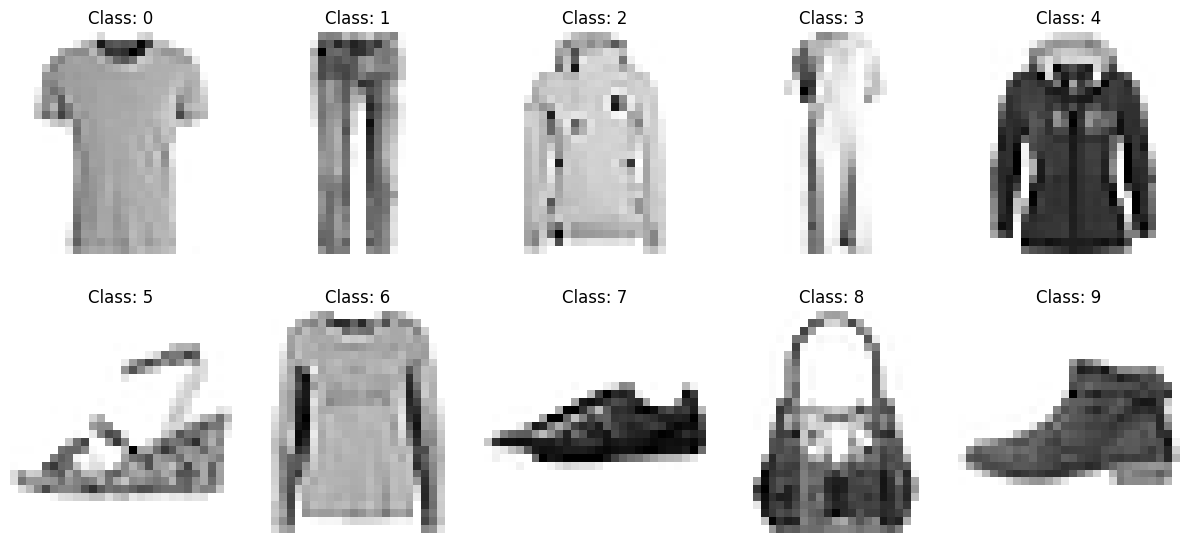

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'train_images' is a NumPy array with shape (n_samples, 28, 28) and
# 'train_labels' is one-hot encoded with shape (n_samples, 10)

# Convert one-hot encoded labels to integer labels if necessary
labels = np.argmax(train_labels, axis=1)

# Display one image from each class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in range(10):
    # Select the indices of images from class i
    indices_of_class_i = np.where(labels == i)[0]
    # Select the first image index of class i
    image_index = indices_of_class_i[0]
    axes[i].imshow(train_images[image_index], cmap=plt.cm.binary)
    axes[i].set_title(f'Class: {i}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report for Model 1:")
print(classification_report(true_labels, pred_labels_1, target_names=class_names))

print("Classification Report for Model 2:")
print(classification_report(true_labels, pred_labels_2, target_names=class_names))

print("Classification Report for Model 3:")
print(classification_report(true_labels, pred_labels_3, target_names=class_names))

print("Classification Report for Committee:")
print(classification_report(true_labels, final_predictions, target_names=class_names))

Classification Report for Model 1:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.82      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.78      0.80      0.79      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.81      0.77      0.79      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.68      0.67      0.68      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Classification Report for Model 2:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pull

### Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired transformations
datagen = ImageDataGenerator(
    rotation_range=10,  # random rotations between 0 and 10 degrees
    width_shift_range=0.1,  # random horizontal shifts
    height_shift_range=0.1,  # random vertical shifts
    shear_range=0.1,  # shear transformations
    zoom_range=0.1,  # random zoom
    horizontal_flip=True,  # random horizontal flips
    fill_mode='nearest'
)

# Fit the data generator on your training data
datagen.fit(train_images)



### Drop out

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model using the Sequential API
model_3 = Sequential([
    # Add convolutional layer
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Add max pooling layer
    MaxPooling2D(2, 2),
    # Add dropout layer
    Dropout(0.25),  # Dropout layer after pooling
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Add dropout layer
    Dropout(0.25),
    # Flatten the output to feed into the dense layers
    Flatten(),
    # Dense layer with relu activation
    Dense(128, activation='relu'),
    # Add dropout layer
    Dropout(0.5),
    # Output layer with softmax activation
    Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary to verify the structure
model_3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 128)         0

### Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Adding Batch Normalization to Model 3
model_3 = Sequential([
        # Add convolutional layer
    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
        # Add max pooling layer
    MaxPooling2D(2, 2),
        # Add convolutional layer
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
        # Add max pooling layer
    MaxPooling2D(2, 2),
    Flatten(),
            # Dense layer with relu activation
    Dense(128, activation='relu'),
    BatchNormalization(),
            # Dense layer with softmax activation
    Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary to verify the structure
model_3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_7 (Bat  (None, 26, 26, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_8 (Bat  (None, 11, 11, 128)       512       
 chNormalization)                                                
                                                      

#### Weighted Accuracy

In [ ]:
# Extract maximum validation accuracy from the training history
model_1_val_acc = max(history_1.history['val_accuracy'])
model_2_val_acc = max(history_2.history['val_accuracy'])
model_3_val_acc = max(history_3.history['val_accuracy'])

import numpy as np

# Calculate weights based on validation accuracies
weights = np.array([model_1_val_acc, model_2_val_acc, model_3_val_acc])
weights /= weights.sum()  # Normalize weights

# Calculate weighted predictions
weighted_preds = (weights[0] * preds_1 +
                        weights[1] * preds_2 +
                        weights[2] * preds_3)

# Convert weighted predictions to final predicted classes
final_predictions = np.argmax(weighted_preds, axis=1)

# Calculate the accuracy of the committee
committee_accuracy = np.mean(final_predictions == test_true_labels)
print(f'Weighted Committee Accuracy: {committee_accuracy:.3f}')



Weighted Committee Accuracy: 0.903


### Neural network Wide and deep

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, BatchNormalization, Dropout

# Assuming `X_train` is your input training data
input_shape = X_train.shape[1:]  # Replace 'X_train' with your actual input shape variable

# Input layer
input_layer = Input(shape=input_shape)

# Hidden layer 1 with batch normalization and dropout
hidden1 = Dense(30, activation="relu")(input_layer)
hidden1 = BatchNormalization()(hidden1)
hidden1 = Dropout(0.5)(hidden1)  # 50% dropout

# Hidden layer 2 with batch normalization and dropout
hidden2 = Dense(30, activation="relu")(hidden1)
hidden2 = BatchNormalization()(hidden2)
hidden2 = Dropout(0.5)(hidden2)  # 50% dropout

# Concatenate layer
concat = Concatenate()([input_layer, hidden2])

# Output layer
output = Dense(10, activation="softmax")(concat)

# Create model
model = Model(inputs=[input_layer], outputs=[output])

# Summary of the model to verify the architecture
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use this if labels are integers
              metrics=['accuracy'])




Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 dense_17 (Dense)            (None, 28, 28, 30)           60        ['input_6[0][0]']             
                                                                                                  
 batch_normalization_12 (Ba  (None, 28, 28, 30)           120       ['dense_17[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 dropout_10 (Dropout)        (None, 28, 28, 30)           0         ['batch_normalization_12